# Part II - Data Analysis/Data Visualization Report: Bike Ride Trends and Biker Types of Ford GoBike System
## by Somood Musleh

## Investigation Overview

This analysis explores Ford GoBike system trip data to understand key trends in bike ride duration and user demographics. It focuses on:
- Predicting trip duration using attributes like age, time (weekday, hour), user type, and gender.
- Providing insights into patterns in bike usage.

## Dataset Overview and Executive Summary

This document explores the Ford GoBike's trip data for public containing bike rides . The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age. 13K data points were removed from the analysis due to missing values in some fields, data inconsistent, or outliner issues.

In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [64]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_201902-fordgobike-tripdatae.csv')

In [65]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_hour,member_age,log_duration_sec
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,Thu,23,45,3.200029
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False,Thu,23,60,3.253580
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,False,Thu,23,36,3.059563
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,False,Thu,23,30,3.208173
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,False,Thu,23,31,3.195900


In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170557 entries, 0 to 170556
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             170557 non-null  int64  
 1   start_time               170557 non-null  object 
 2   end_time                 170557 non-null  object 
 3   start_station_id         170557 non-null  float64
 4   start_station_name       170557 non-null  object 
 5   start_station_latitude   170557 non-null  float64
 6   start_station_longitude  170557 non-null  float64
 7   end_station_id           170557 non-null  float64
 8   end_station_name         170557 non-null  object 
 9   end_station_latitude     170557 non-null  float64
 10  end_station_longitude    170557 non-null  float64
 11  bike_id                  170557 non-null  int64  
 12  user_type                170557 non-null  object 
 13  member_birth_year        170557 non-null  int64  
 14  memb

In [67]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_time_dayofweek'] = df_clean['start_time_dayofweek'].astype(ordered_weekdays)

In [68]:
# change the data type for start and end time to be datetime64[ns]
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [69]:
# change the data type for bike_share_for_all_trip to be bool
df_clean.bike_share_for_all_trip = (df_clean.bike_share_for_all_trip == 'Yes')

In [70]:
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['start_time_hour'] = df_clean['start_time_hour'].astype('category')

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170557 entries, 0 to 170556
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170557 non-null  int64         
 1   start_time               170557 non-null  datetime64[ns]
 2   end_time                 170557 non-null  datetime64[ns]
 3   start_station_id         170557 non-null  float64       
 4   start_station_name       170557 non-null  object        
 5   start_station_latitude   170557 non-null  float64       
 6   start_station_longitude  170557 non-null  float64       
 7   end_station_id           170557 non-null  float64       
 8   end_station_name         170557 non-null  object        
 9   end_station_latitude     170557 non-null  float64       
 10  end_station_longitude    170557 non-null  float64       
 11  bike_id                  170557 non-null  int64         
 12  user_type       

## Visualization 1 :- Distribution of Trip Durations
**Description**
- This histogram displays the distribution of trip durations across all rides.

**Clarifications**
- Most trips are short, with the majority below 10,000 seconds (approx. 2.8 hours).
- The distribution has a long tail, indicating a small number of very long rides.


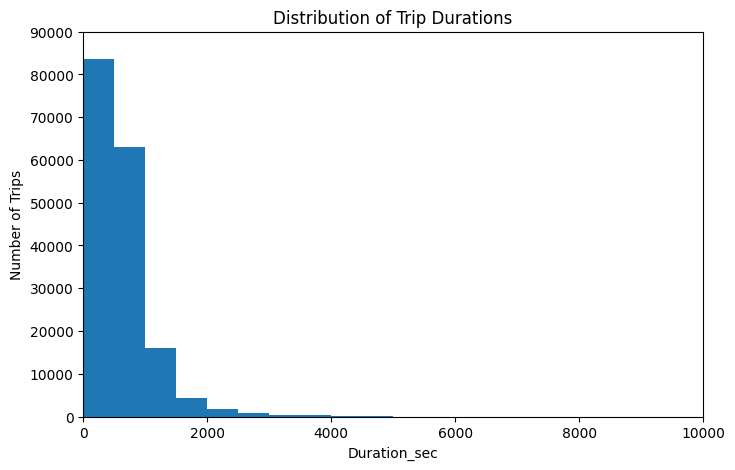

In [72]:
binsize = 500
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([0, 10000, 0, 90000])
plt.show()

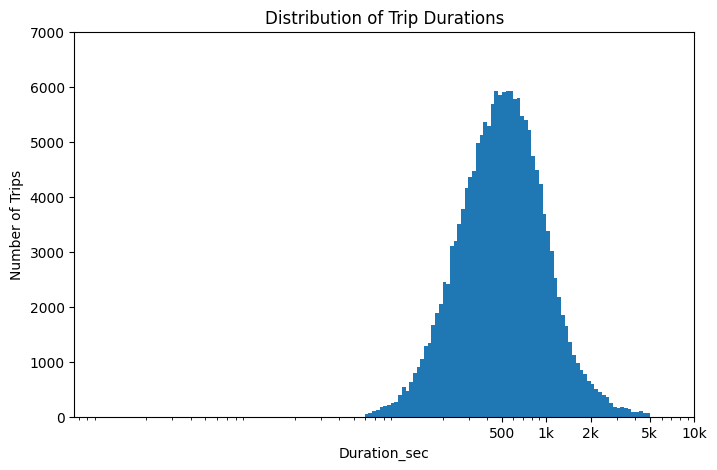

In [73]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 7000])
plt.show()


## Visualization 2 :- Distribution of User Ages
**Description**
- This histogram illustrates the age distribution of users.

**Clarifications**
- The majority of users are in the 20–40 age range.
- Fewer users are older than 60.


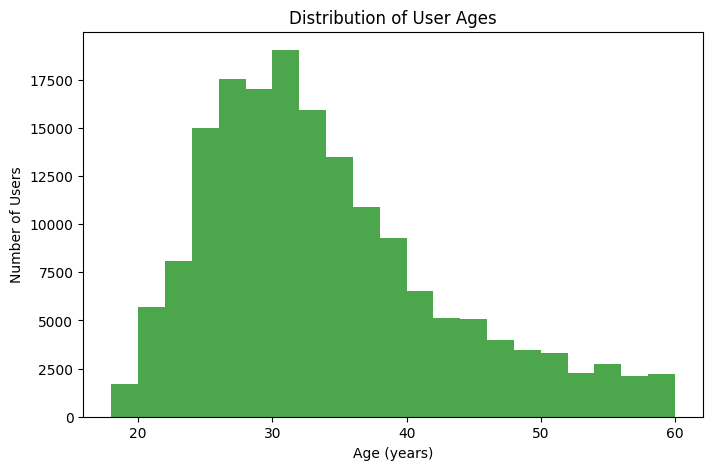

In [74]:
binsize = 2
bins = np.arange(df_clean['member_age'].min(), df_clean['member_age'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data=df_clean, x='member_age', bins=bins, color='green', alpha=0.7)
plt.title('Distribution of User Ages')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()


## Visualization 3 :- Trip Count by Hour, User Type, and Gender

**Description**
- This multi-plot visualization compares trip counts by:
     - Start time (hour)
     - User type (subscriber or customer)
     - Gender

**Clarifications**
- Peak usage occurs during commuting hours (7–9 AM, 5–7 PM).
- Subscribers dominate peak periods, reflecting regular commuter patterns.
- Gender differences are visible, with more male riders overall.


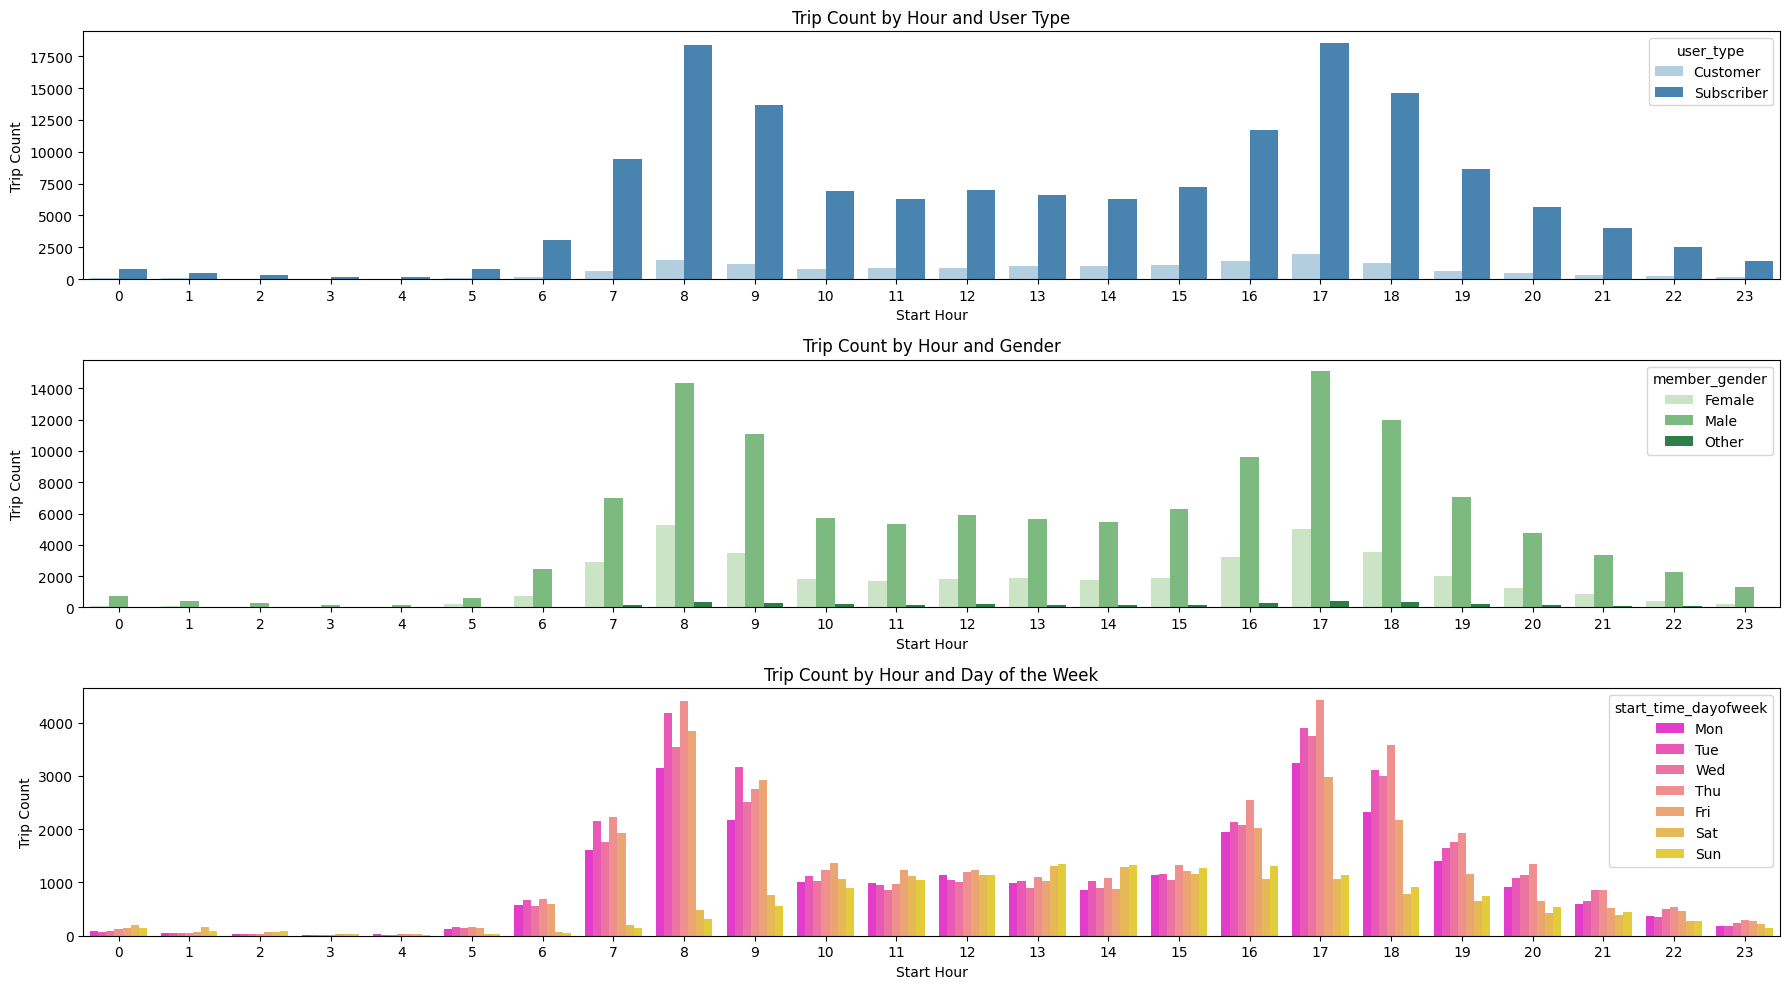

In [75]:
plt.figure(figsize=[18, 10])

# Subplot 1: Start hour vs. user type
plt.subplot(3, 1, 1)
sns.countplot(data=df_clean, x='start_time_hour', hue='user_type', palette='Blues')
plt.title('Trip Count by Hour and User Type')
plt.xlabel('Start Hour')
plt.ylabel('Trip Count')

# Subplot 2: Start hour vs. gender
plt.subplot(3, 1, 2)
sns.countplot(data=df_clean, x='start_time_hour', hue='member_gender', palette='Greens')
plt.title('Trip Count by Hour and Gender')
plt.xlabel('Start Hour')
plt.ylabel('Trip Count')

# Subplot 3: Start hour vs. day of the week
plt.subplot(3, 1, 3)
sns.countplot(data=df_clean, x='start_time_hour', hue='start_time_dayofweek', palette='spring')
plt.title('Trip Count by Hour and Day of the Week')
plt.xlabel('Start Hour')
plt.ylabel('Trip Count')

plt.tight_layout()
plt.show()


## Visualization 4 :- Age vs. Trip Duration
**Description**
- Scatter plots and heatmaps illustrate the relationship between age and trip duration.

**Clarifications**
- Riders younger than 40 generally take longer trips.
- Older users tend to have shorter trip durations.

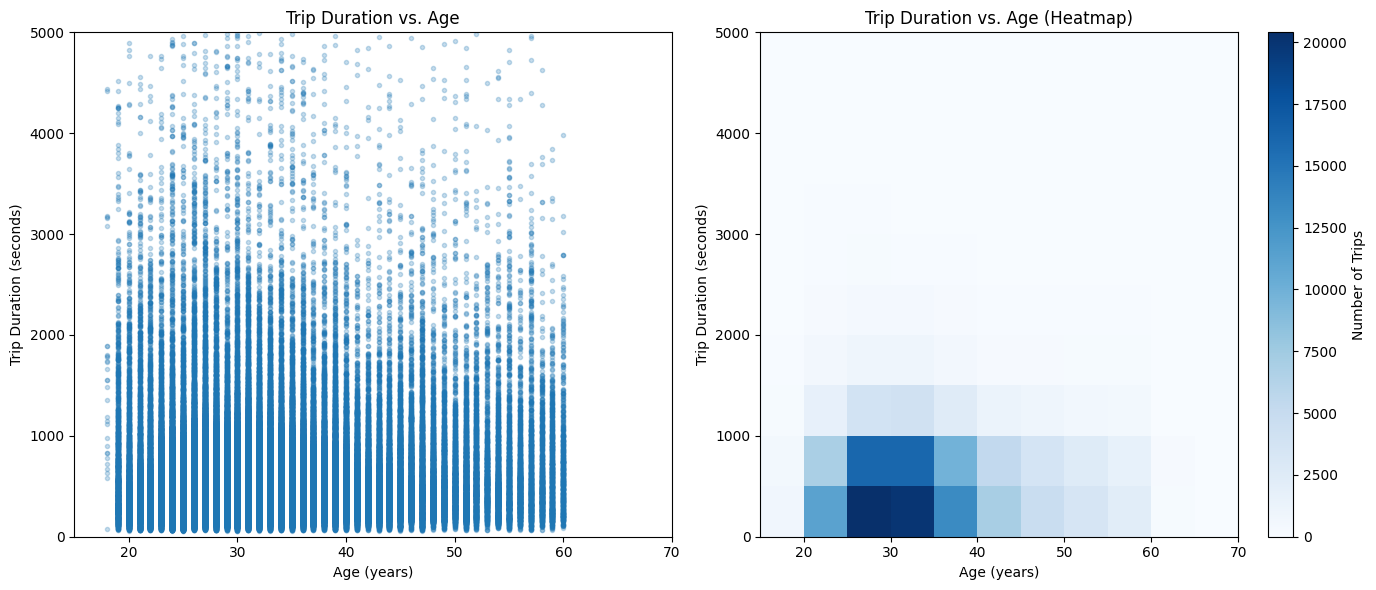

In [76]:
plt.figure(figsize=[14, 6])

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(df_clean['member_age'], df_clean['duration_sec'], alpha=0.25, marker='.')
plt.title('Trip Duration vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (seconds)')
plt.axis([15, 70, 0, 5000])

# Heatmap
plt.subplot(1, 2, 2)
bins_y = np.arange(0, 5000 + 500, 500)
bins_x = np.arange(15, 70 + 5, 5)
plt.hist2d(df_clean['member_age'], df_clean['duration_sec'], bins=[bins_x, bins_y], cmap='Blues')
plt.colorbar(label='Number of Trips')
plt.title('Trip Duration vs. Age (Heatmap)')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (seconds)')

plt.tight_layout()
plt.show()


## (Visualization 5 :- Hourly Trip Durations by Age Group
**Description**
- Point plots show variations in average trip duration for users under and over 40 years of age.

**Clarifications**
- Younger riders (<40 years) have longer durations, especially on weekends.
- Older riders (≥40 years) have consistent durations across all times.

In [77]:
age_below_40 = df_clean[df_clean['member_age'] < 40]
age_above_40 = df_clean[df_clean['member_age'] >= 40]

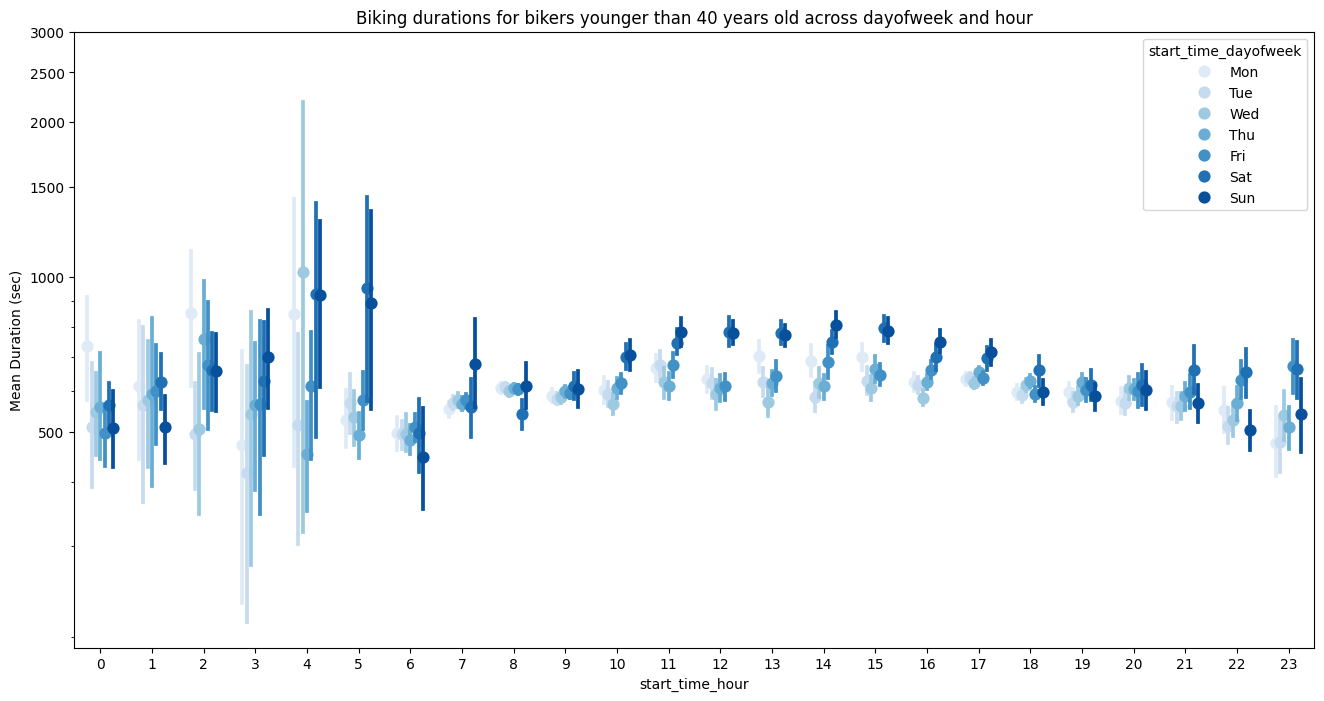

In [78]:
fig = plt.figure(figsize = [16,8])

ax = sns.pointplot(data = age_below_forty, x = 'start_time_hour', y = 'duration_sec', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers younger than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500,2000,2500,3000], [500,1000,1500,2000,2500,3000]);
ax.set_yticklabels([],minor = True);

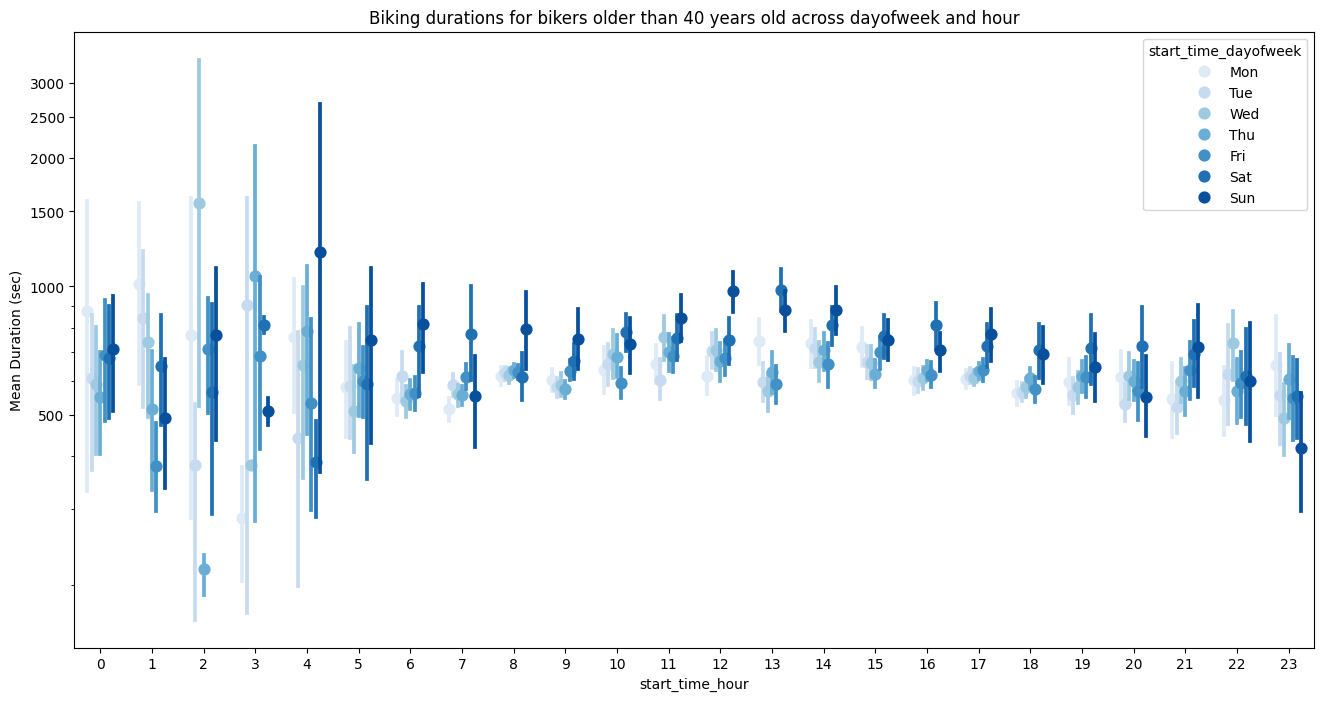

In [79]:
fig = plt.figure(figsize = [16,8])

ax = sns.pointplot(data = age_above_forty, x = 'start_time_hour', y = 'duration_sec', hue = 'start_time_dayofweek',
           palette = 'Blues', linestyles = '', dodge = 0.5);

plt.title('Biking durations for bikers older than 40 years old across dayofweek and hour');
plt.ylabel('Mean Duration (sec)');
plt.yscale('log');
plt.yticks([500,1000,1500,2000,2500,3000], [500,1000,1500,2000,2500,3000]);
ax.set_yticklabels([],minor = True);

## Visualization 6 :- Trip Duration and Age by Gender
The main thing I want to explore in this part of the analysis is how the three categorical measures of gender into the relationship between trip duration and age.

For the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration.

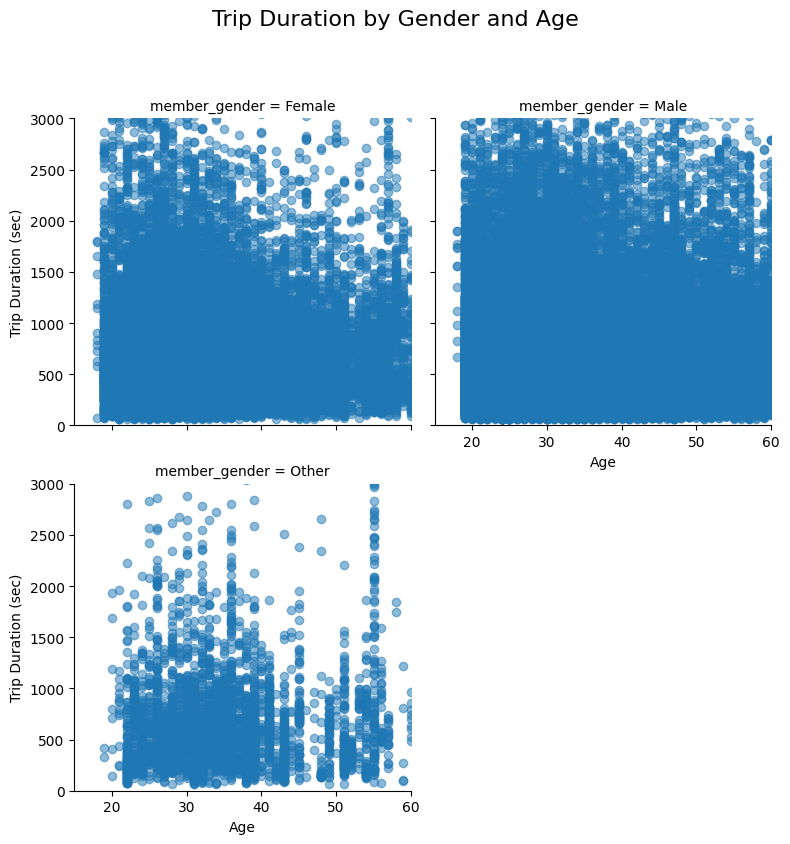

In [80]:
gender = sns.FacetGrid(data=df_clean, col='member_gender', col_wrap=2, 
                       xlim=[15, 60], ylim=[0, 3000], height=4)
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.5)
gender.set_xlabels('Age')
gender.set_ylabels('Trip Duration (sec)')
gender.fig.suptitle('Trip Duration by Gender and Age', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


## Visualization 7 :- Trip Duration and Age by User Type
The main thing I want to explore in this part of the analysis is how the three categorical measures of user type into the relationship between trip duration and age.

For the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age.

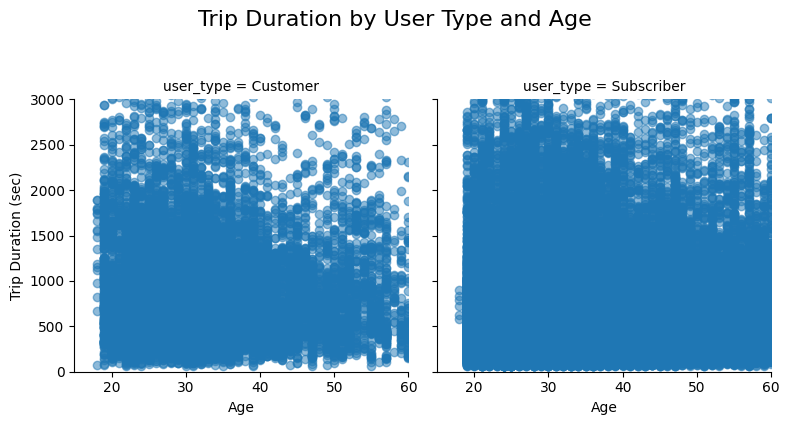

In [81]:
user_type = sns.FacetGrid(data=df_clean, col='user_type', col_wrap=2, 
                          xlim=[15, 60], ylim=[0, 3000], height=4)
user_type.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.5)
user_type.set_xlabels('Age')
user_type.set_ylabels('Trip Duration (sec)')
user_type.fig.suptitle('Trip Duration by User Type and Age', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


In [82]:
from IPython.display import HTML

# JavaScript code to toggle raw code cells visibility
HTML('''
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code.">
</form>
''')

# Export notebook as HTML or PDF
!jupyter nbconvert Part_II_explanatory_template.ipynb --to html --no-input --output=Part_II_explanatory_template.html

[NbConvertApp] Converting notebook Part_II_explanatory_template.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1404869 bytes to Part_II_explanatory_template.html
